<a href="https://colab.research.google.com/github/alisidd-00/alisiddiq/blob/main/projectDSElab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING RELEVANT LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import max_error



**READING CSV FILE**

In [ ]:
df=pd.read_csv('/content/song_data (G8) - song_data (G8).csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [ ]:
df.shape

(18835, 15)

**CHECKING NULL VALUES**

In [ ]:
df.isnull().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

**CHECKING PROPERTIES OF DATASET**

In [ ]:
df.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


In [ ]:
df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [ ]:
df.tail()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
18830,Let It Breathe,60,159645,0.893,0.500,0.151,0.000065,11,0.111,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765,0.495,0.161,0.000001,11,0.105,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847,0.719,0.325,0.000000,0,0.125,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945,0.488,0.326,0.015700,3,0.119,-12.020,1,0.0328,106.063,4,0.323
18834,Up to Me,60,193533,0.911,0.640,0.381,0.000254,4,0.104,-11.790,1,0.0302,91.490,4,0.581


In [ ]:
df.skew()

<ipython-input-9-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


song_popularity    -0.501487
song_duration_ms    3.257477
acousticness        1.071164
danceability       -0.391719
energy             -0.620738
instrumentalness    2.985176
key                -0.002520
liveness            2.215423
loudness           -1.929511
audio_mode         -0.530308
speechiness         2.271018
tempo               0.442855
time_signature     -4.979342
audio_valence      -0.016423
dtype: float64

**RENAMING COLUMNS FOR EASE TO USE**

In [ ]:
df=df.rename(columns={'song_name':'Name','song_popularity':'Popularity','song_duration_ms':'Duration (ms)','audio_mode':'Mode','liveness':'Spiritedness'})
df

,Name,Popularity,Duration (ms),acousticness,danceability,energy,instrumentalness,key,Spiritedness,loudness,Mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


**SORTING POPULARITY IN ASCENDING ORDER**

In [ ]:
df=df.sort_values(by='Popularity', ascending=True)
df

,Name,Popularity,Duration (ms),acousticness,danceability,energy,instrumentalness,key,Spiritedness,loudness,Mode,speechiness,tempo,time_signature,audio_valence
10479,Forastero,0,267687,0.212000,0.591,0.826,0.000000,9,0.1070,-5.899,0,0.2430,173.823,4,0.843
9995,Trouble Adjusting,0,222933,0.011000,0.363,0.824,0.000000,4,0.1050,-3.316,1,0.0405,118.660,4,0.164
4014,Saturday Night's Alright For Fighting,0,224306,0.026100,0.538,0.956,0.000147,9,0.2790,-4.022,1,0.1230,150.028,4,0.720
18551,Many Lives,0,286066,0.183000,0.637,0.749,0.088300,6,0.1530,-5.659,1,0.0310,99.973,4,0.334
4017,Teddy Picker,0,165000,0.000286,0.637,0.963,0.000889,9,0.0449,-5.116,1,0.0882,150.100,4,0.823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11697,Happier,100,214289,0.191000,0.687,0.792,0.000000,5,0.1670,-2.749,1,0.0452,100.015,4,0.671
7636,Happier,100,214289,0.191000,0.687,0.792,0.000000,5,0.1670,-2.749,1,0.0452,100.015,4,0.671
14176,Happier,100,214289,0.191000,0.687,0.792,0.000000,5,0.1670,-2.749,1,0.0452,100.015,4,0.671
7568,Happier,100,214289,0.191000,0.687,0.792,0.000000,5,0.1670,-2.749,1,0.0452,100.015,4,0.671


**GROUPING DATA ACCORDING TO KEY**

In [ ]:
dfnew=df.groupby(['key'])
dfnew.describe()

Popularity                                                      \
         count       mean        std  min   25%   50%   75%    max   
key                                                                  
0       2182.0  52.971127  22.012451  0.0  40.0  56.0  69.0   95.0   
1       2164.0  56.036044  22.265963  0.0  43.0  59.0  73.0   98.0   
2       1715.0  51.871720  21.505986  0.0  39.0  55.0  68.0   99.0   
3        512.0  50.457031  20.903518  0.0  39.0  53.5  65.0   93.0   
4       1327.0  51.763376  22.424361  0.0  39.0  54.0  69.0   97.0   
5       1574.0  53.162008  21.928591  0.0  41.0  55.0  69.0  100.0   
6       1351.0  55.113249  21.995752  0.0  43.0  58.0  70.0   98.0   
7       2032.0  51.031004  20.991934  0.0  39.0  54.0  66.0   94.0   
8       1349.0  52.591549  22.538394  0.0  40.0  55.0  69.0   97.0   
9       1698.0  51.286808  21.467978  0.0  40.0  54.0  67.0   96.0   
10      1331.0  53.550714  21.280746  0.0  41.0  55.0  69.0   96.0   
11      1600.0  54.147500  22.407215  0.0  41.0  57.0  70.0   98.0   

    Duration (ms)                 ... time_signature      audio_valence  \
            count           mean  ...            75%  max         count   
key                               ...                                     
0          2182.0  220231.790101  ...            4.0  5.0        2182.0   
1          2164.0  215372.215342  ...            4.0  5.0        2164.0   
2          1715.0  222138.601749  ...            4.0  5.0        1715.0   
3           512.0  214549.423828  ...            4.0  5.0         512.0   
4          1327.0  218870.291635  ...            4.0  5.0        1327.0   
5          1574.0  216964.841804  ...            4.0  5.0        1574.0   
6          1351.0  217205.233161  ...            4.0  5.0        1351.0   
7          2032.0  218785.203248  ...            4.0  5.0        2032.0   
8          1349.0  215147.784285  ...            4.0  5.0        1349.0   
9          1698.0  219878.041225  ...            4.0  5.0        1698.0   
10         1331.0  218728.129226  ...            4.0  5.0        1331.0   
11         1600.0  217445.780625  ...            4.0  5.0        1600.0   

                                                                  
         mean       std     min      25%     50%      75%    max  
key                                                               
0    0.526016  0.251265  0.0320  0.32400  0.5215  0.73000  0.978  
1    0.519437  0.236989  0.0384  0.32875  0.5290  0.70225  0.981  
2    0.509632  0.246301  0.0301  0.31800  0.5020  0.70550  0.973  
3    0.523986  0.261937  0.0347  0.31000  0.4960  0.76225  0.975  
4    0.518182  0.252330  0.0309  0.30600  0.5100  0.72000  0.979  
5    0.544156  0.246549  0.0336  0.34725  0.5570  0.74600  0.977  
6    0.514799  0.241854  0.0292  0.31900  0.5210  0.70450  0.979  
7    0.538865  0.247600  0.0000  0.34375  0.5355  0.74200  0.984  
8    0.531753  0.248406  0.0243  0.34500  0.5320  0.73200  0.978  
9    0.537660  0.240180  0.0292  0.34925  0.5365  0.73025  0.982  
10   0.526909  0.242579  0.0333  0.34500  0.5220  0.72250  0.975  
11   0.539961  0.229013  0.0000  0.37375  0.5295  0.72100  0.980  

[12 rows x 104 columns]

**CORELATION VIEWED BY PLOTTING HEATMAP**

<ipython-input-13-5d904f76ddce>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, ax=ax, cmap="YlGnBu")


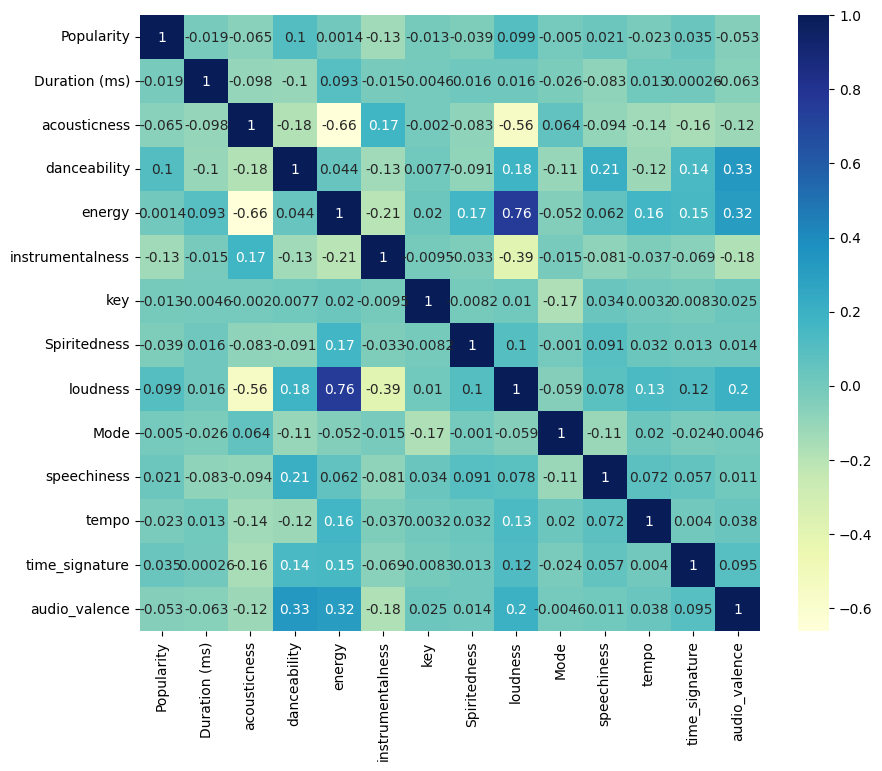

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, ax=ax, cmap="YlGnBu")
plt.show()

**CHECKING OUTLIERS OF ALL ATTRIBUTES**

<Axes: xlabel='Popularity'>

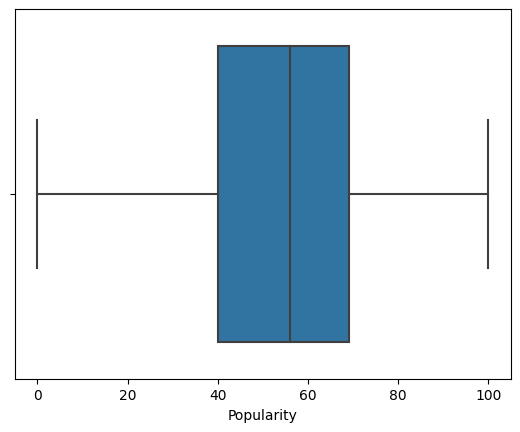

In [ ]:
sns.boxplot(x=df['Popularity'])

<Axes: xlabel='Duration (ms)'>

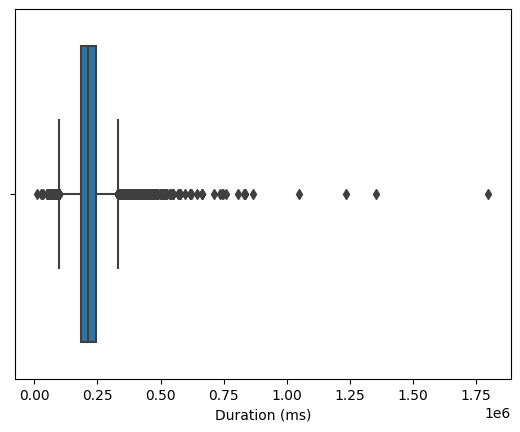

In [ ]:
sns.boxplot(x=df['Duration (ms)'])

<Axes: xlabel='acousticness'>

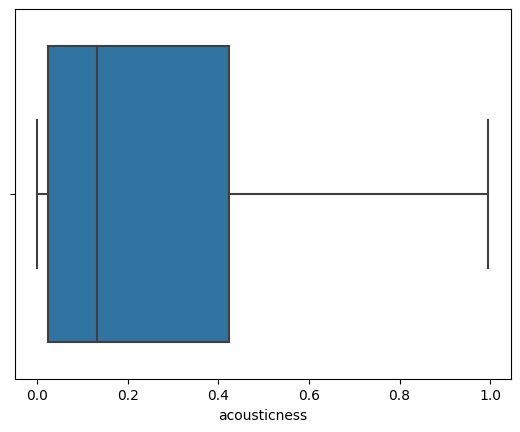

In [ ]:
sns.boxplot(x=df['acousticness'])

<Axes: xlabel='danceability'>

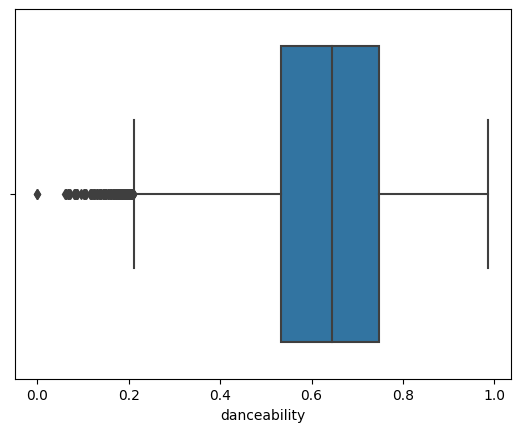

In [ ]:
sns.boxplot(x=df['danceability'])

<Axes: xlabel='energy'>

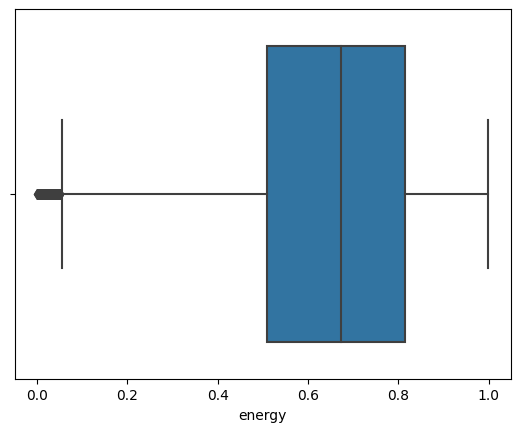

In [ ]:
sns.boxplot(x=df['energy'])

<Axes: xlabel='instrumentalness'>

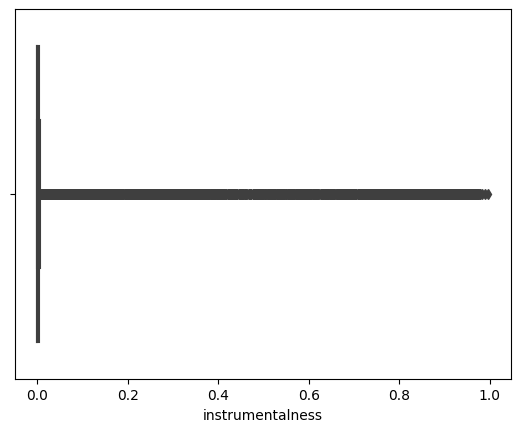

In [ ]:
sns.boxplot(x=df['instrumentalness'])

<Axes: xlabel='key'>

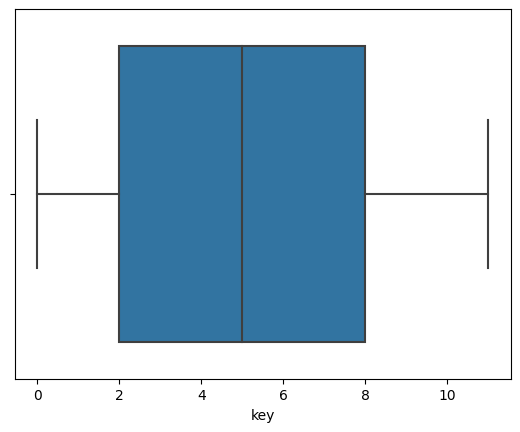

In [ ]:
sns.boxplot(x=df['key'])

<Axes: xlabel='Spiritedness'>

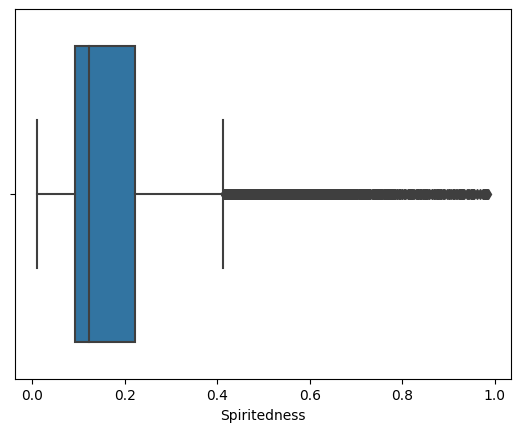

In [ ]:
sns.boxplot(x=df['Spiritedness'])

<Axes: xlabel='loudness'>

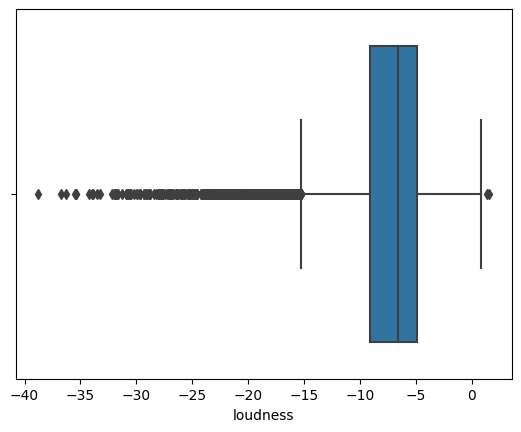

In [ ]:
sns.boxplot(x=df['loudness'])

<Axes: xlabel='Mode'>

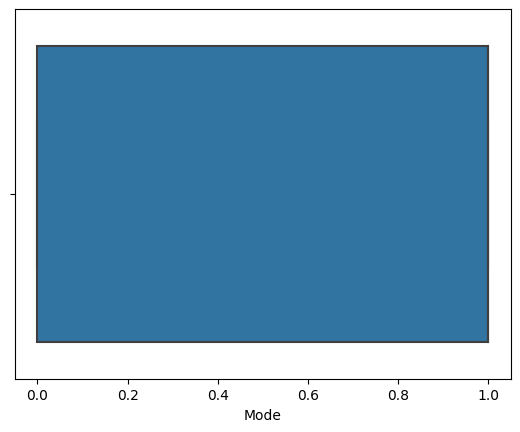

In [ ]:
sns.boxplot(x=df['Mode'])

<Axes: xlabel='speechiness'>

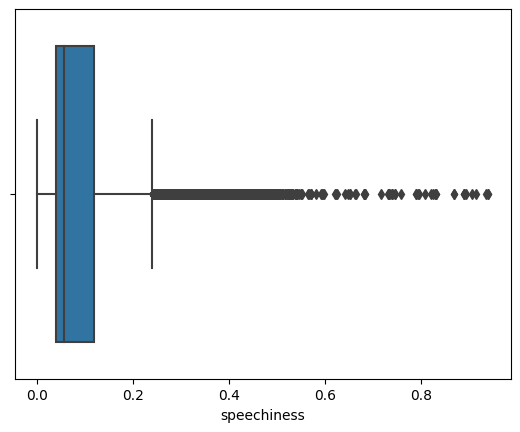

In [ ]:
sns.boxplot(x=df['speechiness'])

<Axes: xlabel='tempo'>

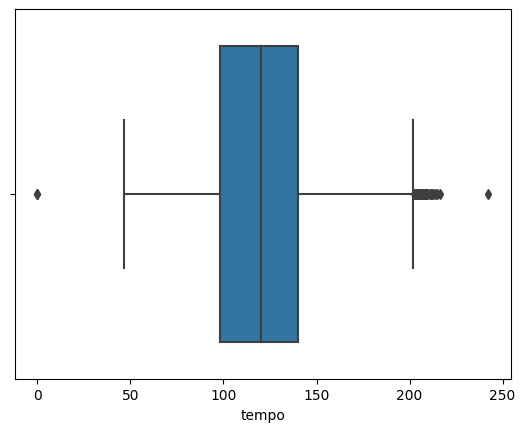

In [ ]:
sns.boxplot(x=df['tempo'])

<Axes: xlabel='time_signature'>

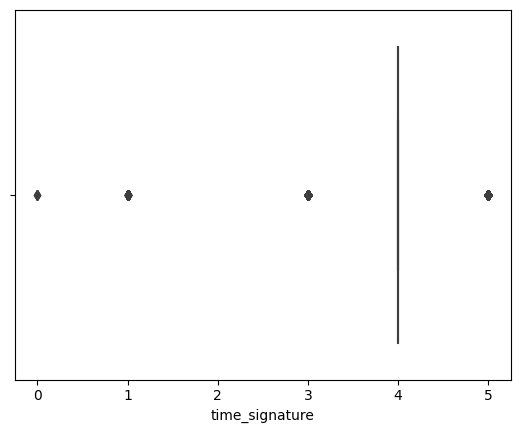

In [ ]:
sns.boxplot(x=df['time_signature'])

<Axes: xlabel='audio_valence'>

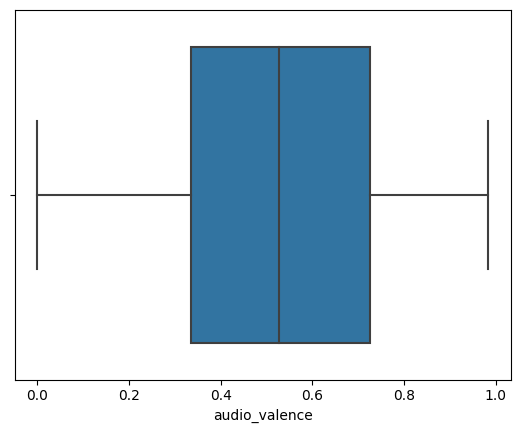

In [ ]:
sns.boxplot(x=df['audio_valence'])

**REMOVING OUTLIERS USING Z-SCORE CALCULATIONS and THEN REPLACING THEM WITH MEAN VALUES**

---



In [ ]:

columns_to_check = df.columns[1:]
z_scores = df[columns_to_check].apply(lambda x: np.abs((x - x.mean()) / x.std()))
threshold = 3

df[columns_to_check] = np.where((z_scores > threshold) | (z_scores < -threshold), np.nan, df[columns_to_check])
df[columns_to_check] = df[columns_to_check].mask((df[columns_to_check] < -threshold) | (df[columns_to_check] > threshold), 0)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18835 entries, 10479 to 5593
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              18835 non-null  object 
 1   Popularity        18835 non-null  float64
 2   Duration (ms)     18599 non-null  float64
 3   acousticness      18835 non-null  float64
 4   danceability      18773 non-null  float64
 5   energy            18828 non-null  float64
 6   instrumentalness  17799 non-null  float64
 7   key               18835 non-null  float64
 8   Spiritedness      18316 non-null  float64
 9   loudness          18505 non-null  float64
 10  Mode              18835 non-null  float64
 11  speechiness       18474 non-null  float64
 12  tempo             18810 non-null  float64
 13  time_signature    17754 non-null  float64
 14  audio_valence     18835 non-null  float64
dtypes: float64(14), object(1)
memory usage: 2.3+ MB


In [ ]:
df=df.fillna(df.mean())

<ipython-input-29-6f8c6f28e805>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df=df.fillna(df.mean())


In [ ]:
df.isnull().sum()

Name                0
Popularity          0
Duration (ms)       0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
Spiritedness        0
loudness            0
Mode                0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

**ORDINAL ENCODING DONE FOR NAME COLUMN**

In [ ]:
# Assuming 'data' is your DataFrame
df1 = df.copy()
df1 = df1.astype(str)

# Iterate over categorical columns and apply ordinal encoding
for col in df1.columns:
    if df1[col].dtype == 'object':
        oe = OrdinalEncoder()
        df1[col] = oe.fit_transform(df1[[col]])

**PRINCIPAL COMPONENT ANALYSIS**

In [ ]:
# First, scale your data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df1)

# Create PCA object with desired number of components
n_components = 2  # Set the number of principal components you want to keep
pca = PCA(n_components=n_components)

# Perform PCA on the scaled data
principal_components = pca.fit_transform(scaled_data)

# Access the explained variance ratio of each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Access the eigenvalues of each principal component
eigenvalues = pca.singular_values_

# Access the feature contributions for each principal component
feature_contributions = pca.components_


# Print the feature contributions for each principal component
for i in range(n_components):
    print(f"Principal Component {i+1} Feature Contributions:")
    for j in range(len(df1.columns)):
        print(f"Feature {j+1}: {pca.components_[i, j]}")


# You can access the transformed data (projected onto the principal components) using 'principal_components'
print("Transformed data shape:", principal_components.shape)


Principal Component 1 Feature Contributions:
Feature 1: 0.0499695491436446
Feature 2: -0.04913296301210225
Feature 3: 0.0
Feature 4: 0.421659603377891
Feature 5: -0.3703197459905471
Feature 6: -0.5406519970729255
Feature 7: 0.10961565121638456
Feature 8: 0.054535093744319044
Feature 9: 0.03456206342127291
Feature 10: -0.24462060937688723
Feature 11: 0.15616628525735265
Feature 12: -0.3310794166740656
Feature 13: 0.0
Feature 14: 0.0
Feature 15: -0.4216941353354541
Principal Component 2 Feature Contributions:
Feature 1: -0.05397474095707327
Feature 2: 0.10387555510671585
Feature 3: -0.0
Feature 4: -0.4913846773754028
Feature 5: -0.5337494331808378
Feature 6: 0.4053383878515644
Feature 7: 0.237271158022743
Feature 8: 0.08277631301195744
Feature 9: 0.21429434960070307
Feature 10: 0.059326696108986984
Feature 11: 0.24632268033580784
Feature 12: -0.30160127473635384
Feature 13: -0.0
Feature 14: -0.0
Feature 15: -0.17725854508563152
Transformed data shape: (18835, 2)


**WRAPPER METHOD USING FORWARD SELECTION** **(FEATURE ENGINEERING)**

In [ ]:
X =df1.drop([ 'Popularity'], axis=1)
y = df1['Popularity']

In [ ]:
sfs = SFS(LinearRegression(),
          k_features=5,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [ ]:
sfs.fit(X, y)
sfs.k_feature_names_

('danceability', 'energy', 'instrumentalness', 'Spiritedness', 'Mode')

**WRAPPER METHOD USING BACKWARD ELIMINATION** **(FEATURE ENGINEERING)**

In [ ]:

# Assuming you have your feature matrix 'X' and target vector 'y'
X = df1[['Name', 'Duration (ms)', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'Spiritedness', 'loudness', 'Mode', 'speechiness', 'tempo', 'time_signature', 'audio_valence']]
y = df1['Popularity']  # Target Feature

# Convert data to numpy arrays if they are not already
X = np.array(X)
y = np.array(y)

# Create an instance of the estimator/model
estimator = LinearRegression()

# Specify the number of features to select
n_features_to_select = 5

# Perform backward feature selection
selector = RFE(estimator, n_features_to_select=n_features_to_select, step=1)
selector = selector.fit(X, y)

# Get the selected feature indices and mask
selected_feature_indices = selector.get_support(indices=True)

# Print the selected feature names
print("Selected Features:")
for index in selected_feature_indices:
    print(df1.columns[index])


Selected Features:
acousticness
danceability
instrumentalness
Spiritedness
loudness


**MULTIVARIBALE LINEAR REGRESSION FOR FORWARD SELECTION WITH ERROR CALCULATION**

In [ ]:
x = df1[['danceability','energy','instrumentalness','Spiritedness','Mode']]

y= df1[['Popularity']]

# Taking only the selected two attributes from the dataset
x.columns = [ 'Danceability','Energy','Instrumentalness','Spiritedness','Mode']

y.columns=['Popularity']

In [ ]:
l=LinearRegression()
l.fit(x,y)
y_pred=l.predict(x)
print(y_pred)

[[0.03949506]
 [0.04263946]
 [0.01447441]
 ...
 [0.00456435]
 [0.01144137]
 [0.0095227 ]]


In [ ]:
truevalues0=df['Popularity']
predictedvalues0=y_pred
mse = mean_squared_error(truevalues0, predictedvalues0)
rmse = np.sqrt(mse)
max_err = max_error(truevalues0, predictedvalues0)

print("Maximum Error:", max_err)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Maximum Error: 2.99305931591501
Mean Squared Error (MSE): 0.0612093628940813
Root Mean Squared Error (RMSE): 0.24740526044140876


**MULTIVARIABLE LINEAR REGRESSION FOR BACKWARD ELIMINATION WITH ERROR CALCULATION**

In [ ]:
x = df1[['acousticness','danceability','instrumentalness','Spiritedness','loudness']]

y= df1[['Popularity']]

# Taking only the selected two attributes from the dataset
x.columns = [ 'Danceability','Energy','Instrumentalness','Spiritedness','Mode']

y.columns=['Popularity']

In [ ]:
l=LinearRegression()
l.fit(x,y)
y_pred1=l.predict(x)
print(y_pred1)

[[0.04797251]
 [0.03492478]
 [0.03522448]
 ...
 [0.01583407]
 [0.02037099]
 [0.01679566]]


In [ ]:
truevalues=df['Popularity']
predictedvalues=y_pred1
mse = mean_squared_error(truevalues, predictedvalues)
rmse = np.sqrt(mse)


max_err = max_error(truevalues, predictedvalues)

print("Maximum Error:", max_err)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Maximum Error: 2.9860874956106533
Mean Squared Error (MSE): 0.06130427409424847
Root Mean Squared Error (RMSE): 0.24759699936438742
